<a href="https://colab.research.google.com/github/Nhatkhang/Machine_learning_CBD/blob/Project_assignments/Author_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using NLP and techniques of supervised learning (including Deep
Learning) and unsupervised learning (emphasizing on unsupervised
for this project), and collect thousand texts from Gutenberg project
(and 7 novels) for at least 10 authors, build a project to classify
text-author. The project should follow the guideline as:

1. Pre-process data using Spacy and other methods.
2. Perform data exploration
3. Using Bag of Word, apply supervised models such as Naive
Bayes, Logistic Regression, Decision Tree, Random Forest,
KNN, SVM and Gradient Boosting, including GridSearchCV.
4. Similar to 3., but using TF-IDF.
5. Similar to 3., but using word2vec.
6. Appy RNN to do classification.
7. Using unsupervised technique, visualize bar graphs for clusters
containing 10 author documents. Adjust by silhouette scores.
8. Using LSA, LDA and NNMF, print out top ten words (with their
highest loading) for each topic modeling. Analyze and compare
among three methods.
9. Write up analysis and conclusions.

# Introduction
The main goal of this report is to research and present the NLP techniques including supervised and unsupervised learning to build a authorship classifier. The text processing tools in this report are Bag of word, TF-IDF and word2vec applied to the Gutenberg data set. This report is structured as followed:
1. Load and process data
2. Data Exploration
3. Supervised learning used Bag of Word, TF-IDF, Word2vec
4. Recurrent neural network (RNN)
5. Unsupervised learning
6. Application of LSA
7. Conclusion






## 1. Load and process data

In [0]:
### importing libraries
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline
import nltk
import random
import time
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords # Import the stop word list
from random import randint 
from nltk.tokenize import RegexpTokenizer
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
import warnings
warnings.filterwarnings("ignore")

In [182]:
nltk.download('gutenberg')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
file_ID=nltk.corpus.gutenberg.fileids()
author_list=[]
data_set=[]
for f in file_ID: 
  tmp=(nltk.corpus.gutenberg.words(f))
  for i in range(len(tmp)):
    if tmp[i]==']':
      author_list.append(tmp[1:i])
      data_set.append(tmp[i+1:len(tmp)])
      break
    

In [0]:
## remove stopwords
for i in range (len(file_ID)):
  #data_set[i]=[ w.lower() for w in data_set[i]] ## convert to lower case first
  data_set[i]=[w for w in data_set[i] if not w.lower() in stopwords.words("english")]

In [0]:
author=[]
name=[]
author_list[3]=['The', 'King', 'by','James', 'Bible'] ## adding by for easy
for i in range(len (file_ID)):
  #print(i,author_list[i])
  for k in range(len (author_list[i])):
    if author_list[i][k]=='by':
      author.append((author_list[i][k+1:len(author_list[i])]))
      name.append((author_list[i][0:k]))
authors=[]
for i in range(len(file_ID)):
  if author[i][-1].isnumeric() == True:
    authors.append(author[i][0:-1])
  else:
    authors.append(author[i])

authors=[" ".join(authors[i]) for i in range(len(authors))]
name=[" ".join(name[i]) for i in range(len(name))]

In [186]:
for i,k in zip(authors, name):
  print(i,k)

Jane Austen Emma
Jane Austen Persuasion
Jane Austen Sense and Sensibility
James Bible The King
William Blake Poems
Sara Cone Bryant Stories to Tell to Children
Thornton W . Burgess The Adventures of Buster Bear
Lewis Carroll Alice ' s Adventures in Wonderland
G . K . Chesterton The Ball and The Cross
G . K . Chesterton The Wisdom of Father Brown
G . K . Chesterton The Man Who Was Thursday
Maria Edgeworth The Parent ' s Assistant ,
Herman Melville Moby Dick
John Milton Paradise Lost
William Shakespeare The Tragedie of Julius Caesar
William Shakespeare The Tragedie of Hamlet
William Shakespeare The Tragedie of Macbeth
Walt Whitman Leaves of Grass


We have 18 texts with 12 unique authors. This quantity is too small to build a proper machine learning model, thus, additional stratergy is applied, i.e. each text will be devided into 200 sub texts, then the total number of sample is increased while the labels (authorship) will remain the same. 

In [0]:
def randomList(m, n):   # function to create a list with length M and sum of them is N
    # Create an array of size m where  
    # every element is initialized to 0  
    arr = [0] * m;  
    # To make the sum of the final list as n  
    for i in range(n) : 
        # Increment any random element  
        arr[randint(0, n) % m] += 1;  
    return arr

In [188]:
update_data_set=[]
update_name=[]
update_author=[]
for i in range (len(file_ID)):
  arr=randomList(200, len(data_set[i]))
  st=0
  for ii in arr:
    fs=st+ii
    update_data_set.append(" ".join(data_set[i][st:fs]))
    update_name.append(name[i])
    update_author.append(authors[i])
    st=fs
  print(fs,len(data_set[i]))

103970 103970
52381 52381
74822 74822
593752 593752
5219 5219
30661 30661
10208 10208
19008 19008
54019 54019
48114 48114
38807 38807
118066 118066
152910 152910
61893 61893
16079 16079
22985 22985
14939 14939
93680 93680


In [0]:
tokenizer = RegexpTokenizer(r'\w+')
for i in range (len(update_data_set)):
    update_data_set[i] = tokenizer.tokenize(update_data_set[i])
    update_data_set[i] = " ".join(update_data_set[i]) ## rejoin


We have fisnihed the data preparation, we have a data set consists of 18000 samples categorized into 12 authors.

##2. Data Exploration

In [0]:
## convert to data frame
data=np.array([update_author, update_name,update_data_set])
data=np.transpose(data)
df = pd.DataFrame(data, columns=['Author', 'Book_name', 'Text'])

In [191]:
print(update_data_set[1])

give pleasant society Highbury large populous village almost amounting town Hartfield spite separate lawn shrubberies name really belong afforded equals Woodhouses first consequence looked many acquaintance place father universally civil one among could accepted lieu Miss Taylor even half day melancholy change Emma could sigh wish impossible things till father awoke made necessary cheerful spirits required support nervous man easily depressed fond every body used hating part hating change every kind Matrimony origin change always disagreeable means yet reconciled daughter marrying could ever speak compassion though entirely match affection obliged part Miss Taylor habits gentle selfishness never able suppose people could feel differently much disposed think Miss Taylor done sad thing would great deal happier spent rest life Hartfield Emma smiled chatted cheerfully could keep thoughts tea came impossible say exactly said dinner Poor Miss Taylor wish pity Mr Weston ever thought cannot ag

In [192]:
print('Dataframe dimensions:', data.shape) ## print shape
pd.set_option('display.max_columns', None)
df.head(10)

Dataframe dimensions: (3600, 3)


,Author,Book_name,Text
0,Jane Austen,Emma,VOLUME CHAPTER Emma Woodhouse handsome clever ...
1,Jane Austen,Emma,give pleasant society Highbury large populous ...
2,Jane Austen,Emma,Square happy circumstance animated Mr Woodhous...
3,Jane Austen,Emma,would never marry may comfort thing Mr Knightl...
4,Jane Austen,Emma,agree entirely much better thing Invite dinner...
5,Jane Austen,Emma,unlikely therefore ever want father assistance...
6,Jane Austen,Emma,wedding cake proved vain earnestly tried preve...
7,Jane Austen,Emma,seminary establishment thing professed long se...
8,Jane Austen,Emma,would interesting certainly kind undertaking h...
9,Jane Austen,Emma,sentiment distinct independent Mrs Weston obje...


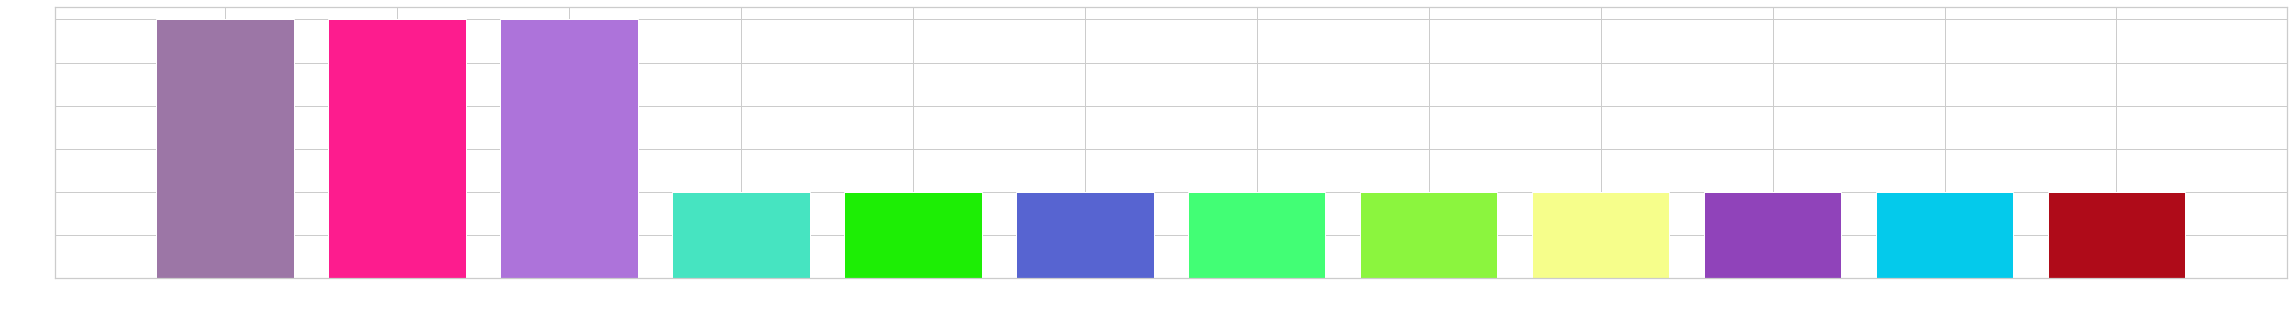

In [194]:
fig = plt.figure(1, figsize=(40,5))
y = df.Author.value_counts()
plt.bar(range(len(y)), y,tick_label=y.index,color=np.random.rand(18,3))
plt.xlabel("Authors")
plt.ylabel("# of samples")
COLOR = 'White'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [0]:
all_words = df['Text'].str.split(expand=True).unstack().value_counts()

Text(0.5, 1.0, 'Top 25 words appears most in the data')

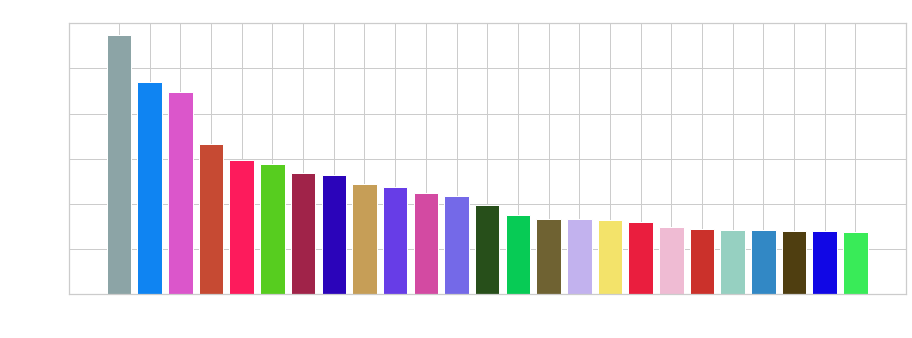

In [196]:
indx=all_words.index
fig = plt.figure(1, figsize=(15,5))
y = all_words[0:25]
plt.bar(range(len(y)), y,tick_label=indx[0:25],color=np.random.rand(25,3))
plt.xlabel("Words")
plt.ylabel("# of appear in text")
plt.title('Top 25 words appears most in the data')

Let's examine word count/length statistics:

In [197]:
document_lengths = np.array(list(map(len, df.Text.str.split(' '))))

print("The average number of words in a document is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a document is: {}.".format(min(document_lengths)))
print("The maximum number of words in a document is: {}.".format(max(document_lengths)))

The average number of words in a document is: 302.54583333333335.
The minimum number of words in a document is: 8.
The maximum number of words in a document is: 2405.


Text(0, 0.5, 'Count')

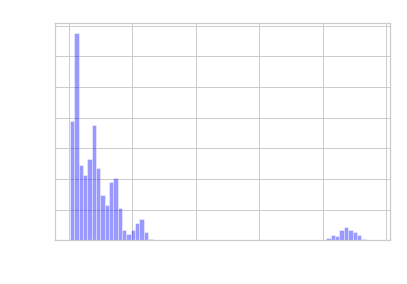

In [198]:
# Plot word count distribution
sns.distplot(document_lengths, kde = False, bins = 70, color = 'blue').set_title("Word Count Distribution")
plt.xlabel('Text Length (Words)')
plt.ylabel('Count')
#plt.xlim(0, 100)

Most of the text has the number of words less than 200.

In [199]:
print("There are {} samples with over 150 words.".format(sum(document_lengths > 150)))


There are 2048 samples with over 150 words.


In [200]:
df.Text[document_lengths == 10]

840    Peace Love God Father dear Mercy Pity Peace Lo...
854    round fold Saying Wrath meekness health sickne...
Name: Text, dtype: object

In [0]:
df['document_lengths']=document_lengths

In [202]:
df[df.document_lengths>20]
df.head()

,Author,Book_name,Text,document_lengths
0,Jane Austen,Emma,VOLUME CHAPTER Emma Woodhouse handsome clever ...,390
1,Jane Austen,Emma,give pleasant society Highbury large populous ...,392
2,Jane Austen,Emma,Square happy circumstance animated Mr Woodhous...,363
3,Jane Austen,Emma,would never marry may comfort thing Mr Knightl...,382
4,Jane Austen,Emma,agree entirely much better thing Invite dinner...,413


We have finished the exploration of the data, thus we will move to next section.

##3. Supervised learning used Bag of Word, TF-IDF, Word2vec

### 3.1 Bag of words

Create the training and test data

In [0]:
text_train, text_test, author_train, author_test = train_test_split(df.Text, df.Author, test_size = 0.2, random_state = 5)

In [204]:
# Check shapes of created datasets
print(np.shape(text_train))
print(np.shape(text_test))
print(np.shape(author_train))
print(np.shape(author_test))

(2880,)
(720,)
(2880,)
(720,)


Creating Features from a Bag of Words

In [205]:
print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000).fit(text_train) 
train_X = vectorizer.transform(text_train)
train_X = train_X.toarray()
test_X = vectorizer.transform(text_test)
test_X = test_X.toarray()

Creating the bag of words...



In [206]:
print (train_X.shape)
print (test_X.shape)

(2880, 5000)
(720, 5000)


In [0]:
author_lb = LabelEncoder()
Y_train = author_lb.fit_transform(author_train)
Y_test = author_lb.transform(author_test)

In [208]:
## check the grid CV serach to have best parameter on 10 % data set
from sklearn.model_selection import GridSearchCV
DTC = tree.DecisionTreeClassifier()
RF = RandomForestClassifier()
GBC = GradientBoostingClassifier()
SVM = SVC()
LogR = LogisticRegression()
NVG = GaussianNB()
KNN = KNeighborsClassifier()
## 10% of data set
X_train_10=train_X[0:1440]
Y_train_10=Y_train[0:1440]
X_test_10 =test_X[0:360]
Y_test_10 =Y_test[0:360]
### parameter change
parameters_logr = [{'C': [1, 10,100]}]
parameters_dtc = [{'max_depth': [10,20,30] }]
parameters_RF = [{'n_estimators': [10,20,30]}]
parameters_GBC = [{'n_estimators': [10,20,30]}]
parameters_svm = [{'C': [1, 10,100]}]
parameters_knn = [{'n_neighbors': [10, 20,30]}]
model_parameters=[parameters_RF,parameters_logr,parameters_dtc,parameters_GBC,parameters_svm,parameters_knn]
## no change param for Naive Bayes

model_predict=[RF,LogR,DTC,GBC,SVM,KNN]
## SVM will be updated later
model_name=['Random Forest Classifier'
            ,'Logistic Regression'
            , 'Decision Tree Classifer'
            ,'Gradient Boosting Classifier'
            ,'SVM Classifier'
            ,'K-nearest neighbour']
for model, name, para in zip (model_predict,model_name,model_parameters):
    time_start = time.clock()
    grid_search = GridSearchCV(estimator = model,
                           param_grid = para,
                           scoring = 'accuracy',
                           cv = 5)
    grid_search = grid_search.fit(X_train_10, Y_train_10)
    accuracy = grid_search.best_score_
    param_best=grid_search.best_params_
    print(name)
    #para_out.append(param_best)
    print('Best parameter:     ', param_best)
    print('Best Accuracy: %12.3f'%accuracy)
print('======================End of gettting best parameter======================')
## 

Random Forest Classifier
Best parameter:      {'n_estimators': 30}
Best Accuracy:        0.883
Logistic Regression
Best parameter:      {'C': 1}
Best Accuracy:        0.981
Decision Tree Classifer
Best parameter:      {'max_depth': 30}
Best Accuracy:        0.772
Gradient Boosting Classifier
Best parameter:      {'n_estimators': 30}
Best Accuracy:        0.894
SVM Classifier
Best parameter:      {'C': 100}
Best Accuracy:        0.985
K-nearest neighbour
Best parameter:      {'n_neighbors': 10}
Best Accuracy:        0.161
======================End of gettting best parameter======================


As we can see for Random forest an Decission tree, it seems that the parameter is not large enough thus we will use:

In [0]:
DTC = tree.DecisionTreeClassifier(max_depth=100)
RF = RandomForestClassifier(n_estimators=20)
GBC = GradientBoostingClassifier(n_estimators=50)
SVM = SVC(C=100,gamma='auto', class_weight='balanced')
LogR = LogisticRegression(C=1)
NVG = GaussianNB()
#KNN = KNeighborsClassifier(n_neighbors = 12)
KNN = KNeighborsClassifier(n_jobs=-1)


In [210]:
model_predict=[RF,LogR,DTC,GBC,SVM,NVG,KNN]
model_predict=[RF,LogR,DTC,NVG,KNN]
## SVM,GBC will be updated later
model_name=['Random Forest Classifier'
            ,'Logistic Regression'
            , 'Decision Tree Classifer'
#            ,'Gradient Boosting Classifier'
#            ,'SVM Classifier'
            ,'Naive Bayes Gauss'
            ,'K-nearest neighbour']
## loop
for model, name in zip (model_predict,model_name):
    time_start = time.clock()
    clf=model.fit(train_X,Y_train)
    predictions = clf.predict(test_X)
    tmp1=classification_report(Y_test,predictions)
    tmp2=accuracy_score(Y_test,predictions)
    time_elapsed = (time.clock() - time_start)
    print(name)
    print(tmp1)
    print('Accuracy Score: %12.3f'%tmp2)
    print('Computing time: %12.3f second'%time_elapsed)
    print('==========================================================')
    #break
    
    
print('======================End of predicting======================')
## 

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       112
           1       0.97      0.88      0.93        43
           2       1.00      1.00      1.00        45
           3       0.91      0.99      0.95       117
           4       0.93      0.87      0.90        45
           5       0.97      0.88      0.92        41
           6       0.96      0.71      0.81        31
           7       0.96      0.67      0.79        39
           8       1.00      0.93      0.96        41
           9       0.91      0.79      0.85        39
          10       0.89      0.98      0.93        42
          11       0.93      0.98      0.96       125

    accuracy                           0.92       720
   macro avg       0.94      0.89      0.91       720
weighted avg       0.92      0.92      0.92       720

Accuracy Score:        0.918
Computing time:        0.712 second
Logistic Regression
              precision

As we can see, using bag of word, KNN performs badly which produces 24 % of accuracy. Naive Bayes and Logics Regression shows good results where the accuracy is 83 % and 95 % respectively. 

###3.2 TFIDF

Now we will exam the performance of the TFIDF scheme.

In [211]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 5000)
%time tfidf_matrix = vectorizer.fit_transform(df.Text) #fit the vectorizer to synopses
print(tfidf_matrix.shape)
train_X, test_X, author_train, author_test = train_test_split(tfidf_matrix.toarray(), df.Author, test_size = 0.2, random_state = 5)
author_lb = LabelEncoder()
Y_train = author_lb.fit_transform(author_train)
Y_test = author_lb.transform(author_test)


CPU times: user 827 ms, sys: 0 ns, total: 827 ms
Wall time: 826 ms
(3600, 5000)


In [0]:
DTC = tree.DecisionTreeClassifier(max_depth=100)
RF = RandomForestClassifier(n_estimators=20)
GBC = GradientBoostingClassifier(n_estimators=50)
SVM = SVC(C=100,gamma='auto', class_weight='balanced')
LogR = LogisticRegression(C=1)
NVG = GaussianNB()
#KNN = KNeighborsClassifier(n_neighbors = 12)
KNN = KNeighborsClassifier(n_jobs=-1)


In [213]:
model_predict=[RF,LogR,DTC,GBC,SVM,NVG,KNN]
model_predict=[RF,LogR,DTC,NVG,KNN]
## SVM,GBC will be updated later
model_name=['Random Forest Classifier'
            ,'Logistic Regression'
            , 'Decision Tree Classifer'
#            ,'Gradient Boosting Classifier'
#            ,'SVM Classifier'
            ,'Naive Bayes Gauss'
            ,'K-nearest neighbour']
## loop
for model, name in zip (model_predict,model_name):
    time_start = time.clock()
    clf=model.fit(train_X,Y_train)
    predictions = clf.predict(test_X)
    tmp1=classification_report(Y_test,predictions)
    tmp2=accuracy_score(Y_test,predictions)
    time_elapsed = (time.clock() - time_start)
    print(name)
    print(tmp1)
    print('Accuracy Score: %12.3f'%tmp2)
    print('Computing time: %12.3f second'%time_elapsed)
    print('==========================================================')
    #break
    
    
print('======================End of predicting======================')
## 

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       112
           1       0.95      0.88      0.92        43
           2       1.00      1.00      1.00        45
           3       0.95      0.98      0.97       117
           4       0.98      0.91      0.94        45
           5       0.97      0.95      0.96        41
           6       0.94      0.94      0.94        31
           7       1.00      0.54      0.70        39
           8       0.95      0.98      0.96        41
           9       1.00      0.92      0.96        39
          10       0.91      1.00      0.95        42
          11       0.98      0.99      0.98       125

    accuracy                           0.94       720
   macro avg       0.96      0.92      0.93       720
weighted avg       0.95      0.94      0.94       720

Accuracy Score:        0.944
Computing time:        0.768 second
Logistic Regression
              precision

Using TFIDF improves the performance of all classifier. In these scheme, all of the classifier is more than 80 % accuracy.

### 3.3 Word2vec method

In [0]:
## split text 
split_text=[]
test=df.Text
for i in range (len(test)):
  split_text.append(test[i].split())

The word2vec scheme is shown as followed

In [215]:
# converting format
print(len(split_text))

3600


In [0]:
from gensim.models import Word2Vec, KeyedVectors
w2v_model = Word2Vec(split_text, window=1, workers=10,size=200)

In [217]:
print(w2v_model)

Word2Vec(vocab=16587, size=200, alpha=0.025)


In [218]:
vocab = w2v_model.wv.vocab
wordsInVocab = len(vocab)
print(wordsInVocab)

16587


After we get the vector of a word, we can calculate the vector expression of a sentence by average as:

In [0]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.vocab]
    return np.mean(word2vec_model[doc], axis=0)
X =[]
for doc in split_text: #look up each doc in model
    X.append(document_vector(w2v_model, doc))
X = np.array(X) #list to array

In [220]:
print(X.shape)
#print(X[1])

(3600, 200)


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, df.Author, test_size = 0.2, random_state = 5)

In [0]:
author_lb = LabelEncoder()
Y_train_w2v = author_lb.fit_transform(Y_train)
Y_test_w2v = author_lb.transform(Y_test)

In [0]:
DTC = tree.DecisionTreeClassifier(max_depth=100)
RF = RandomForestClassifier(n_estimators=20)
GBC = GradientBoostingClassifier(n_estimators=50)
SVM = SVC(C=100,gamma='auto', class_weight='balanced')
LogR = LogisticRegression(C=1)
NVG = GaussianNB()
#KNN = KNeighborsClassifier(n_neighbors = 12)
KNN = KNeighborsClassifier(n_jobs=-1)

In [224]:
model_predict=[RF,LogR,DTC,GBC,SVM,NVG,KNN]
model_predict=[RF,LogR,DTC,NVG,KNN]
## SVM,GBC will be updated later
model_name=['Random Forest Classifier'
            ,'Logistic Regression'
            , 'Decision Tree Classifer'
#            ,'Gradient Boosting Classifier'
#            ,'SVM Classifier'
            ,'Naive Bayes Gauss'
            ,'K-nearest neighbour']
## loop
for model, name in zip (model_predict,model_name):
    time_start = time.clock()
    clf=model.fit(X_train,Y_train_w2v)
    predictions = clf.predict(X_test)
    tmp1=classification_report(Y_test_w2v,predictions)
    tmp2=accuracy_score(Y_test_w2v,predictions)
    time_elapsed = (time.clock() - time_start)
    print(name)
    print(tmp1)
    print('Accuracy Score: %12.3f'%tmp2)
    print('Computing time: %12.3f second'%time_elapsed)
    print('==========================================================')
    #break
    
    
print('======================End of predicting======================')
## 

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       112
           1       0.78      0.74      0.76        43
           2       1.00      1.00      1.00        45
           3       0.93      0.97      0.95       117
           4       0.81      0.96      0.88        45
           5       0.81      0.63      0.71        41
           6       0.71      0.65      0.68        31
           7       0.80      0.62      0.70        39
           8       0.84      0.63      0.72        41
           9       0.78      0.79      0.78        39
          10       0.92      0.57      0.71        42
          11       0.93      0.99      0.96       125

    accuracy                           0.85       720
   macro avg       0.84      0.79      0.80       720
weighted avg       0.85      0.85      0.84       720

Accuracy Score:        0.846
Computing time:        0.747 second
Logistic Regression
              precision

Using the word2vec, the time consumption is reduced a lot but the accuracy is also decreased

## 4. Recurrent Neural Network for classification

We will use numeric vectorized data from word2vec scheme for this section.

In [0]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D


In [226]:
Y = pd.get_dummies(df['Author']).values
X_train_web, X_test_web, Y_train_web, Y_test_web = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train_web.shape,Y_train_web.shape)
print(X_test_web.shape,Y_test_web.shape)

(3240, 200) (3240, 12)
(360, 200) (360, 12)


In [227]:
model = Sequential()
model.add(Embedding(wordsInVocab, 128, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.1))
model.add(LSTM(128, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(12, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 128)          2123136   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 200, 128)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 12)                1548      
Total params: 2,256,268
Trainable params: 2,256,268
Non-trainable params: 0
_________________________________________________________________
None


In [228]:
from keras.callbacks import EarlyStopping
epochs = 5
batch_size = 64
history = model.fit(X_train_web, Y_train_web, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 2916 samples, validate on 324 samples
Epoch 1/5
2916/2916 [==============================] - 24s 8ms/sample - loss: 2.3729 - acc: 0.1605 - val_loss: 2.3828 - val_acc: 0.1235
Epoch 2/5
2916/2916 [==============================] - 21s 7ms/sample - loss: 2.3482 - acc: 0.1612 - val_loss: 2.3813 - val_acc: 0.1759
Epoch 3/5
2916/2916 [==============================] - 21s 7ms/sample - loss: 2.3461 - acc: 0.1629 - val_loss: 2.3833 - val_acc: 0.1759
Epoch 4/5
2916/2916 [==============================] - 21s 7ms/sample - loss: 2.3463 - acc: 0.1639 - val_loss: 2.3846 - val_acc: 0.1698
Epoch 5/5
2916/2916 [==============================] - 21s 7ms/sample - loss: 2.3437 - acc: 0.1722 - val_loss: 2.3763 - val_acc: 0.1759


Using the data with the w2v method applied in the RNN show bad accuracy.
Let's try text_to_sequence method

In [229]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=10000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 41738 unique tokens.


In [230]:
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X, maxlen=200) ## 200 value to present a sentence
print('Shape of data tensor:', X.shape)

Shape of data tensor: (3600, 200)


In [0]:
X_train_rnn, X_test_rnn, Y_train_rnn, Y_test_rnn = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [232]:
# reduce the side of X, take only 100 first words
X_train_rnn=np.array(X_train_rnn)
X_test_rnn=np.array(X_test_rnn)
print('shape of train and test data to rnn')
print(X_train_rnn.shape)
print(X_test_rnn.shape)
print(Y_train_rnn.shape)
print(Y_test_rnn.shape)

shape of train and test data to rnn
(2880, 200)
(720, 200)
(2880, 12)
(720, 12)


In [233]:
model_rnn = Sequential()
model_rnn.add(Embedding(10000, 128, input_length=200))
model_rnn.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_rnn.add(Dense(12, activation='softmax'))
model_rnn.summary()
model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 128)          1280000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 12)                1548      
Total params: 1,413,132
Trainable params: 1,413,132
Non-trainable params: 0
_________________________________________________________________


In [234]:
# train model
epochs = 15
batch_size = 128
history = model_rnn.fit(X_train_rnn, Y_train_rnn, epochs=epochs, batch_size=batch_size,validation_split=0.1)
## valid by 10 % of train

Train on 2592 samples, validate on 288 samples
Epoch 1/15
2592/2592 [==============================] - 12s 5ms/sample - loss: 2.4061 - acc: 0.2218 - val_loss: 2.2806 - val_acc: 0.4271
Epoch 2/15
2592/2592 [==============================] - 11s 4ms/sample - loss: 2.0538 - acc: 0.3638 - val_loss: 1.6890 - val_acc: 0.3889
Epoch 3/15
2592/2592 [==============================] - 11s 4ms/sample - loss: 1.5871 - acc: 0.4641 - val_loss: 1.4912 - val_acc: 0.5278
Epoch 4/15
2592/2592 [==============================] - 11s 4ms/sample - loss: 1.3773 - acc: 0.5123 - val_loss: 1.2768 - val_acc: 0.6007
Epoch 5/15
2592/2592 [==============================] - 11s 4ms/sample - loss: 1.1281 - acc: 0.5895 - val_loss: 1.0471 - val_acc: 0.5868
Epoch 6/15
2592/2592 [==============================] - 11s 4ms/sample - loss: 0.9320 - acc: 0.6755 - val_loss: 0.8215 - val_acc: 0.7153
Epoch 7/15
2592/2592 [==============================] - 11s 4ms/sample - loss: 0.8083 - acc: 0.7724 - val_loss: 0.8044 - val_acc: 0

In [235]:
## check the accuracy
score, acc= model_rnn.evaluate(X_test_rnn, Y_test_rnn,
                           batch_size=32,
                           verbose=2)
print('Score value',score)
print('Accuracy',acc)
## report 
y_true= [np.where(r==1)[0][0] for r in Y_test_rnn]
yhat_classes = model_rnn.predict_classes(X_test_rnn, verbose=0)
print(classification_report(y_true,yhat_classes)) # later


720/720 - 1s - loss: 0.4065 - acc: 0.8611
Score value 0.4065286987357669
Accuracy 0.8611111
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       112
           1       0.39      0.56      0.46        43
           2       0.92      0.98      0.95        45
           3       0.97      0.95      0.96       117
           4       0.88      0.49      0.63        45
           5       0.97      0.85      0.91        41
           6       0.47      0.87      0.61        31
           7       0.89      0.87      0.88        39
           8       1.00      1.00      1.00        41
           9       0.53      0.23      0.32        39
          10       1.00      1.00      1.00        42
          11       0.99      1.00      1.00       125

    accuracy                           0.86       720
   macro avg       0.83      0.81      0.80       720
weighted avg       0.88      0.86      0.86       720



Accuracy on train: 0.9537037
Accuracy on valid: 0.8715278
lost on train: 0.22029559479819405
lost on valid: 0.37481430504057145


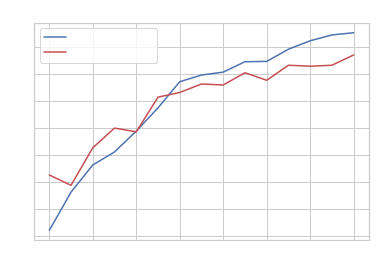

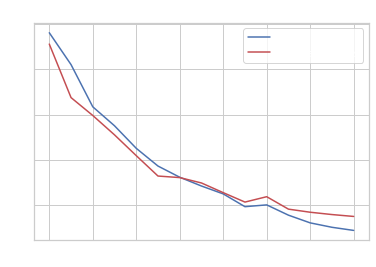

In [236]:
#Plotting graphs
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Accuracy on train:',acc[len(acc)-1] ) 
print('Accuracy on valid:',val_acc[len(acc)-1] ) 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
print('lost on train:',loss[len(acc)-1] ) 
print('lost on valid:',val_loss[len(acc)-1] )  
plt.show()
## print report to see f1, recall 

The model RNN using text to sequence performs very well.

## Clustering data

In [0]:
### k mean cluster using text 2 seq data

In this report we use the matrix from TFIDF to cluster the documents. We choose a typical number of cluster as 5 show in follow

In [0]:
kmeans=KMeans(n_clusters=5,algorithm='elkan', max_iter=100)
kmeans.fit(tfidf_matrix.toarray())
centers = kmeans.cluster_centers_
ssvariance = kmeans.inertia_
clusters = kmeans.labels_.tolist()

In [0]:
terms = vectorizer.get_feature_names()

In [0]:
df['kmeans']=pd.DataFrame(clusters)
df['encode_author']=pd.DataFrame(author_lb.fit_transform(df.Author))

In [178]:
print(df.kmeans.value_counts())

1    1578
3     614
4     613
2     597
0     198
Name: kmeans, dtype: int64


Text(0, 0.5, 'Count')

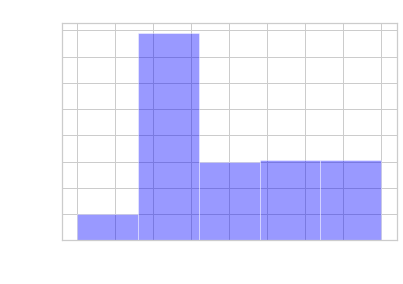

In [179]:
sns.distplot(df.kmeans, kde = False, bins = 5, color = 'blue').set_title("Cluster Distribution")
plt.xlabel('Cluster')
plt.ylabel('Count')

As shown in the figure, all of the cluster contains more than 200 sub-documents. Let's examine the most word appears in each cluster:

In [180]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1] 

for i in range(5):
    print("Cluster %d words: \n" % i, end='')
    
    for ind in order_centroids[i, :10]: #10 with n words per cluster
        print(terms[ind])
    print() #add whitespace
    print() #add whitespace
print()
print()

Top terms per cluster:

Cluster 0 words: 
unto
lord
shall
thou
thy
ye
god
thee
israel
10


Cluster 1 words: 
said
little
alice
one
like
man
syme
turnbull
buster
brown


Cluster 2 words: 
haue
ham
thou
caesar
enter
vs
lord
macb
brutus
vpon


Cluster 3 words: 
mrs
mr
could
would
miss
emma
elinor
marianne
anne
must


Cluster 4 words: 
whale
thou
thee
thy
heaven
one
yet
sea
earth
ahab






# Conclusion
The main goal of this report is to research and present the NLP techniques including supervised and unsupervised learning to build a authorship classifier. The text processing tools in this report are Bag of word, TF-IDF and word2vec applied to the Gutenberg data set. Among the supervised learning, TFIDF seems performs very well in terms of accuracy. In case of BOW, the KNN performs quite bad compared to the other. To have a quick result we can use w2v scheme with a bit lower in the fidelity. 
RNN using w2v vector as input produces a very bad result around 16 % of accuracy, in stead we use the text to sequence scheme for RNN. It can be seen that the RNN using text to sequence give a excellent resut with 15 epochs.
Furthermore, we also done clustering in this case, it can be categorized as a genre or topic of the documents, i.e. several documents of different author can has the same topic (cluster). 

For furture work, we can use LSA, LDA to do topic modeling in stead of Kmeans. A reason why the w2v scheme yields bad result when apply to RNN should be investigated.